In [1]:
import wandb
import pandas as pd
import matplotlib.pyplot as plt


In [7]:

# Initialize wandb API
api = wandb.Api()

# Replace 'your_sweep_id' with your actual sweep ID
sweep_id = 'maximes_crew/S3_SHD_runs/pqc7ir1o'

# Fetch the sweep object
sweep = api.sweep(sweep_id)

# Fetch all runs in the sweep
runs = sweep.runs

X_axis = 'n_layers'
X_axis_name = 'Number of Layers'

sweep_params = ['lr', 'pdrop', 'scheduler_patience', 'scheduler_factor', 'dt_max']

In [3]:
runs

<Runs maximes_crew/S3_SHD_runs>

In [9]:
# Initialize an empty DataFrame to hold the relevant data
data = []

# Extract the necessary data from each run
for run in runs:
    config = run.config
    summary = run.summary
    n_layers = config.get('nb_layers')
    n_hiddens = config.get('nb_hiddens')
    lr = config.get('lr')
    dt_min = config.get('dt_min')
    dt_max = config.get('dt_max')
    best_valid_acc = summary.get('best valid acc')
    pdrop = config.get('pdrop')
    scheduler_patience=config.get('scheduler_patience')

    if best_valid_acc is not None:
        data.append({
            'n_layers': n_layers,
            'n_hiddens': n_hiddens,
            'lr': lr,
            'dt_min': dt_min,
            'dt_max': dt_max,
            'best_valid_acc': best_valid_acc,
            'pdrop':pdrop,
            'scheduler_patience':scheduler_patience
        })



In [10]:
data

[{'n_layers': 3,
  'n_hiddens': 128,
  'lr': 0.001,
  'dt_min': 0.01,
  'dt_max': 1.5,
  'best_valid_acc': 0.9075126262626264,
  'pdrop': 0.5},
 {'n_layers': 3,
  'n_hiddens': 128,
  'lr': 0.001,
  'dt_min': 0.01,
  'dt_max': 1.5,
  'best_valid_acc': 0.9230981691919192,
  'pdrop': 0.5},
 {'n_layers': 3,
  'n_hiddens': 128,
  'lr': 0.001,
  'dt_min': 0.01,
  'dt_max': 1.5,
  'best_valid_acc': 0.9380523989898992,
  'pdrop': 0.5},
 {'n_layers': 3,
  'n_hiddens': 128,
  'lr': 0.001,
  'dt_min': 0.01,
  'dt_max': 1.5,
  'best_valid_acc': 0.9447995580808082,
  'pdrop': 0.5},
 {'n_layers': 3,
  'n_hiddens': 128,
  'lr': 0.001,
  'dt_min': 0.01,
  'dt_max': 1.5,
  'best_valid_acc': 0.9018308080808082,
  'pdrop': 0.5},
 {'n_layers': 3,
  'n_hiddens': 128,
  'lr': 0.001,
  'dt_min': 0.01,
  'dt_max': 1.5,
  'best_valid_acc': 0.9055003156565656,
  'pdrop': 0.5},
 {'n_layers': 3,
  'n_hiddens': 128,
  'lr': 0.001,
  'dt_min': 0.01,
  'dt_max': 1.5,
  'best_valid_acc': 0.9255050505050506,
  'pdrop'

In [11]:
# Convert the data to a DataFrame for easier manipulation
df = pd.DataFrame(data)

# Group by n_layers and lr, then compute the mean of best_valid_acc for each group
df_grouped = df.groupby(sweep_params).agg({'best_valid_acc': 'mean'}).reset_index()

# Now, group by n_layers and take the maximum of these averages
df_final = df_grouped.groupby(X_axis).agg({'best_valid_acc': 'max'}).reset_index()

KeyError: 'scheduler_patience'

In [25]:
df_grouped

,n_layers,lr,dt_min,dt_max,best_valid_acc
0,3,0.005,0.01,0.4,0.920202
1,3,0.005,0.01,0.7,0.925560
2,3,0.005,0.10,0.4,0.938171
3,3,0.005,0.10,0.7,0.926933
4,3,0.010,0.01,0.4,0.918608
5,3,0.010,0.01,0.7,0.925931
6,3,0.010,0.10,0.4,0.940696
7,3,0.010,0.10,0.7,0.928993
8,3,0.010,0.10,1.0,0.932576
9,5,0.005,0.01,0.4,0.922120


In [26]:
df_final

,n_layers,best_valid_acc
0,3,0.940696
1,5,0.935582
2,7,0.930193


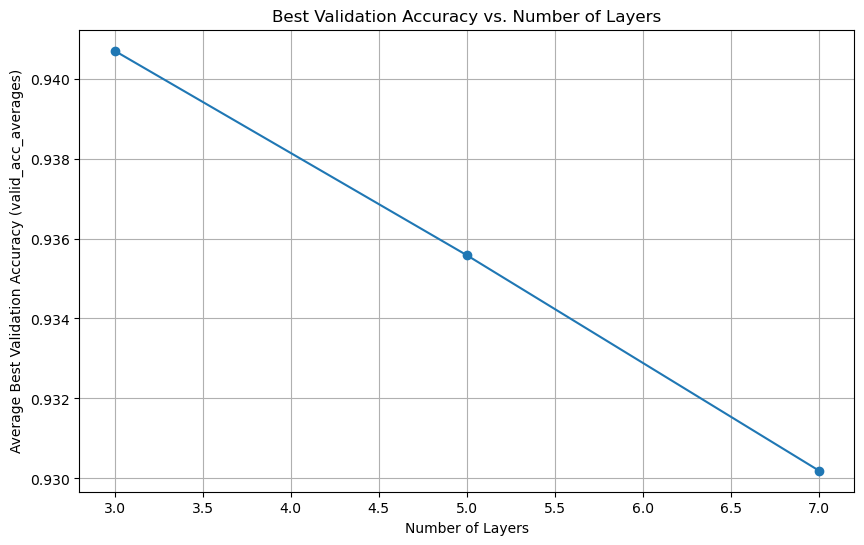

In [27]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(df_final[X_axis], df_final['best_valid_acc'], marker='o')

# # Annotating the plot with lr, dt_min, dt_max
# for i in range(len(df_final)):
#     n_layers = df_final.loc[i, X_axis]
#     best_valid_acc = df_final.loc[i, 'best_valid_acc']
#     lr = df_final.loc[i, 'lr']
#     dt_min = df_final.loc[i, 'dt_min']
#     dt_max = df_final.loc[i, 'dt_max']
    
#     annotation = f"lr={lr}\ndt_min={dt_min}\ndt_max={dt_max}"
#     plt.annotate(annotation, (n_layers, best_valid_acc), textcoords="offset points", xytext=(0,10), ha='center')


plt.xlabel(X_axis_name)
plt.ylabel('Average Best Validation Accuracy (valid_acc_averages)')
plt.title('Best Validation Accuracy vs. Number of Layers')
plt.grid(True)
plt.show()